# Finetuning FTW UNet Baseline Model on Lacuna datasets
### Authored by Tanmoy Chakraborty

In [1]:
!pwd

/home/airg/TChakraborty/adleo_project/ftwfieldmapper/notebooks


In [2]:
import os
os.chdir("/home/airg/TChakraborty/adleo_project/ftwfieldmapper/")
print("Current working directory:", os.getcwd())

Current working directory: /home/airg/TChakraborty/adleo_project/ftwfieldmapper


In [3]:
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn

# Load checkpoint
checkpoint = torch.load("/home/airg/TChakraborty/adleo_project/ftw-3class-full_unet-efficientnetb3_rgbnir_1ba4e1bd.pth")

# Remove _conv_stem.weight
checkpoint.pop("encoder._conv_stem.weight", None)

model = smp.Unet(
    encoder_name="efficientnet-b3",
    encoder_weights=None,
    in_channels=4,  # 4 channels
    classes=3
)

# Load everything else
missing, unexpected = model.load_state_dict(checkpoint, strict=False)

print(f"Missing keys: {missing}")
print(f"Unexpected keys: {unexpected}")


Missing keys: ['encoder._conv_stem.weight']
Unexpected keys: []


/tmp/ipykernel_734184/2066378726.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("/home/airg/TChakraborty/adleo_project/ftw-3class-full_unet-effi

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      4, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          40, 10, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          10, 40, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Ident

In [5]:
device

device(type='cuda')

In [6]:
import yaml
import time
import torch

import numpy as np
import pandas as pd 
from torch.utils.data import DataLoader

configPath = "./src/configs/config_lacuna.yaml"

with open(configPath, "r") as config:
        params = yaml.safe_load(config)

# parameters
params_train = params['Train_Validate']
params_test = params['Test']

In [7]:
# load lacuna datasets. 
from src.lacuna.datatorch import ImageData

# Load data
print('Loading training dataset')
            
train_dataset = ImageData(
        data_path = params_train['data_path'],
        log_dir = params_train['log_dir'], 
        catalog = pd.read_csv(params_train['train_csv_name']).reset_index(drop=True), 
        data_size = params_train['data_size'],
        buffer = params_train['buffer'],
        buffer_comp = params_train['buffer_comp'],
        usage = "train", 
        img_path_cols = params_train['img_path_cols'], 
        label_path_col = params_train['label_path_col'], 
        label_group = params_train['label_group'], 
        apply_normalization = params_train['apply_normalization'],
        normal_strategy = params_train['normal_strategy'],
        stat_procedure = params_train['stat_procedure'],
        global_stats = params_train['global_stats'],
        catalog_index = params_train['catalog_index'],
        trans = params_train['trans'],
        parallel = params_train['parallel'],
        scale_factor = params_train['scale_factor'],
        crop_strategy = params_train['crop_strategy'],
        rotation_degree = params_train['rotation_degree'],
        sigma_range = params_train['sigma_range'],
        br_range = params_train['br_range'],
        contrast_range = params_train['contrast_range'],
        bshift_gamma_range = params_train['bshift_gamma_range'],
        patch_shift = params_train['patch_shift'],
        downfactor = params_train['downfactor'],
        clip_val = params_train['clip_val'],
        nodata = params_train['nodata']
        )
    
train_dataloader = DataLoader(
                        train_dataset,
                        batch_size=params_train["train_batch"],
                        shuffle=True
                        )

# Load data
print('Loading validation dataset')

val_dataset = ImageData(
        data_path = params_train['data_path'],
        log_dir = params_train['log_dir'], 
        catalog = pd.read_csv(params_train['train_csv_name']).reset_index(drop=True), 
        data_size = params_train['data_size'],
        buffer = params_train['buffer'],
        buffer_comp = params_train['buffer_comp'],
        usage = "validate", 
        img_path_cols = params_train['img_path_cols'], 
        label_path_col = params_train['label_path_col'], 
        label_group = params_train['label_group'], 
        apply_normalization = params_train['apply_normalization'],
        normal_strategy = params_train['normal_strategy'],
        stat_procedure = params_train['stat_procedure'],
        global_stats = params_train['global_stats'],
        catalog_index = params_train['catalog_index'],
        trans = params_train['trans'],
        parallel = params_train['parallel'],
        scale_factor = params_train['scale_factor'],
        crop_strategy = params_train['crop_strategy'],
        rotation_degree = params_train['rotation_degree'],
        sigma_range = params_train['sigma_range'],
        br_range = params_train['br_range'],
        contrast_range = params_train['contrast_range'],
        bshift_gamma_range = params_train['bshift_gamma_range'],
        patch_shift = params_train['patch_shift'],
        downfactor = params_train['downfactor'],
        clip_val = params_train['clip_val'],
        nodata = params_train['nodata']
        )

val_dataloader = DataLoader(
                        val_dataset,
                        batch_size=params_train["validate_batch"],
                        shuffle=False
                        )

Loading training dataset
type: <class 'numpy.ndarray'> shape/len: (224, 224, 4)
----------20241 samples loaded in train dataset-----------
Total number of samples in train dataset: 20241
Loading validation dataset
type: <class 'numpy.ndarray'> shape/len: (224, 224, 4)
----------6746 samples loaded in validate dataset-----------
Total number of samples in validate dataset: 6746


#### Finetuning on Lacuna Datasets

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import os
import pandas as pd
import numpy as np


import segmentation_models_pytorch as smp
from src.lacuna.evaluate import evaluate
from src.lacuna.datatorch import ImageData
from src.lacuna.losses import tversky_focal

criterion  = tversky_focal.LocallyWeightedTverskyFocalLoss()
optimizer  = optim.Adam(model.parameters(), lr=params_train["learning_rate_init"])
scheduler  = ReduceLROnPlateau(optimizer, mode="min", patience=10, verbose=True)

num_epochs            = params_train["epoch"]
early_stopping_pat    = params_train.get("early_stopping_patience", 10)
checkpoint_dir        = params_train.get("model_out_dir", "./checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

best_val_loss   = float("inf")
es_counter      = 0
records         = []

for epoch in range(1, num_epochs + 1):
    print(f"\n— Epoch {epoch}/{num_epochs} —")

    # ------------------ training phase ------------------
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for imgs, labels, _mask in tqdm(train_dataloader, desc="Training"):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()
        total   += labels.numel()

    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc  = correct / total

    # ------------------ validation phase ------------------
    model.eval()
    running_val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for imgs, labels in tqdm(val_dataloader, desc="Validating"):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * imgs.size(0)

            preds = outputs.argmax(1)
            correct += (preds == labels).sum().item()
            total   += labels.numel()

    val_loss = running_val_loss / len(val_dataloader.dataset)
    val_acc  = correct / total
    scheduler.step(val_loss)

    # full-set semantic metrics (mIoU, F1, …)
    eval_metrics = evaluate(
        model          = model,
        dataloader     = val_dataloader,
        num_classes    = 3,
        class_mapping  = params_train["class_mapping"],
        device         = device,
        buffer         = params_train.get("buffer", None),
        out_name       = os.path.join(checkpoint_dir, f"epoch{epoch}_metrics.csv")
    )

    # ------------------ logging ------------------
    records.append({
        "epoch":            epoch,
        "train_loss":       train_loss,
        "val_loss":         val_loss,
        "train_acc":        train_acc,
        "val_acc":          val_acc,
        "overall_accuracy": eval_metrics["Overall Accuracy"],
        "mean_accuracy":    eval_metrics["Mean Accuracy"],
        "mean_iou":         eval_metrics["Mean IoU"],
        "mean_precision":   eval_metrics["Mean Precision"],
        "mean_recall":      eval_metrics["Mean Recall"],
        "mean_f1_score":    eval_metrics["Mean F1 Score"],
    })

    print(f"Train ▸ loss {train_loss:.4f}  acc {train_acc:.3f}  |  "
          f"Val ▸ loss {val_loss:.4f}  acc {val_acc:.3f}  |  "
          f"OA {eval_metrics['Overall Accuracy']:.3f}  mIoU {eval_metrics['Mean IoU']:.3f}")

    # ------------------ checkpointing ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        es_counter = 0
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model.pth"))
        print("  ↳ new best model saved")
    else:
        es_counter += 1
        print(f"  ↳ early-stopping counter: {es_counter}/{early_stopping_pat}")

    if es_counter >= early_stopping_pat:
        print("Early stopping triggered.")
        break

# ---------------------------------------------------------------------
# 3.  Persist the log
# ---------------------------------------------------------------------
pd.DataFrame(records).to_csv(os.path.join(checkpoint_dir, "training_metrics.csv"),
                             index=False)
print("✓ training complete – metrics saved.")



— Epoch 1/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.65it/s]


Train ▸ loss 0.6538  acc 0.634  |  Val ▸ loss 0.7192  acc 0.555  |  OA 0.555  mIoU 0.332
  ↳ new best model saved

— Epoch 2/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.49it/s]


Train ▸ loss 0.6468  acc 0.645  |  Val ▸ loss 0.7147  acc 0.520  |  OA 0.520  mIoU 0.302
  ↳ new best model saved

— Epoch 3/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.62it/s]


Train ▸ loss 0.6427  acc 0.650  |  Val ▸ loss 0.6957  acc 0.606  |  OA 0.606  mIoU 0.369
  ↳ new best model saved

— Epoch 4/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.47it/s]


Train ▸ loss 0.6399  acc 0.654  |  Val ▸ loss 0.6933  acc 0.585  |  OA 0.585  mIoU 0.360
  ↳ new best model saved

— Epoch 5/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.46it/s]


Train ▸ loss 0.6382  acc 0.657  |  Val ▸ loss 0.6945  acc 0.591  |  OA 0.591  mIoU 0.361
  ↳ early-stopping counter: 1/10

— Epoch 6/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.57it/s]


Train ▸ loss 0.6365  acc 0.659  |  Val ▸ loss 0.6922  acc 0.595  |  OA 0.595  mIoU 0.365
  ↳ new best model saved

— Epoch 7/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.59it/s]


Train ▸ loss 0.6346  acc 0.663  |  Val ▸ loss 0.7103  acc 0.631  |  OA 0.631  mIoU 0.376
  ↳ early-stopping counter: 1/10

— Epoch 8/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.46it/s]


Train ▸ loss 0.6336  acc 0.665  |  Val ▸ loss 0.6999  acc 0.583  |  OA 0.583  mIoU 0.349
  ↳ early-stopping counter: 2/10

— Epoch 9/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:16<00:00, 25.63it/s]


Train ▸ loss 0.6319  acc 0.667  |  Val ▸ loss 0.6886  acc 0.607  |  OA 0.607  mIoU 0.373
  ↳ new best model saved

— Epoch 10/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.58it/s]


Train ▸ loss 0.6314  acc 0.667  |  Val ▸ loss 0.6884  acc 0.640  |  OA 0.640  mIoU 0.393
  ↳ new best model saved

— Epoch 11/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.62it/s]


Train ▸ loss 0.6305  acc 0.670  |  Val ▸ loss 0.7019  acc 0.587  |  OA 0.587  mIoU 0.355
  ↳ early-stopping counter: 1/10

— Epoch 12/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.50it/s]


Train ▸ loss 0.6321  acc 0.666  |  Val ▸ loss 0.7206  acc 0.614  |  OA 0.614  mIoU 0.356
  ↳ early-stopping counter: 2/10

— Epoch 13/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.53it/s]


Train ▸ loss 0.6294  acc 0.671  |  Val ▸ loss 0.6942  acc 0.641  |  OA 0.641  mIoU 0.390
  ↳ early-stopping counter: 3/10

— Epoch 14/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.57it/s]


Train ▸ loss 0.6280  acc 0.673  |  Val ▸ loss 0.6853  acc 0.616  |  OA 0.616  mIoU 0.380
  ↳ new best model saved

— Epoch 15/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.48it/s]


Train ▸ loss 0.6269  acc 0.676  |  Val ▸ loss 0.6845  acc 0.640  |  OA 0.640  mIoU 0.395
  ↳ new best model saved

— Epoch 16/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.59it/s]


Train ▸ loss 0.6254  acc 0.678  |  Val ▸ loss 0.6914  acc 0.578  |  OA 0.578  mIoU 0.352
  ↳ early-stopping counter: 1/10

— Epoch 17/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.53it/s]


Train ▸ loss 0.6245  acc 0.680  |  Val ▸ loss 0.6923  acc 0.621  |  OA 0.621  mIoU 0.378
  ↳ early-stopping counter: 2/10

— Epoch 18/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.59it/s]


Train ▸ loss 0.6246  acc 0.680  |  Val ▸ loss 0.6853  acc 0.632  |  OA 0.632  mIoU 0.388
  ↳ early-stopping counter: 3/10

— Epoch 19/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.62it/s]


Train ▸ loss 0.6243  acc 0.681  |  Val ▸ loss 0.6854  acc 0.620  |  OA 0.620  mIoU 0.383
  ↳ early-stopping counter: 4/10

— Epoch 20/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.59it/s]


Train ▸ loss 0.6226  acc 0.683  |  Val ▸ loss 0.6898  acc 0.624  |  OA 0.624  mIoU 0.382
  ↳ early-stopping counter: 5/10

— Epoch 21/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.53it/s]


Train ▸ loss 0.6222  acc 0.685  |  Val ▸ loss 0.7185  acc 0.639  |  OA 0.639  mIoU 0.371
  ↳ early-stopping counter: 6/10

— Epoch 22/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.58it/s]


Train ▸ loss 0.6208  acc 0.686  |  Val ▸ loss 0.6853  acc 0.615  |  OA 0.615  mIoU 0.378
  ↳ early-stopping counter: 7/10

— Epoch 23/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.45it/s]


Train ▸ loss 0.6207  acc 0.687  |  Val ▸ loss 0.7037  acc 0.645  |  OA 0.645  mIoU 0.387
  ↳ early-stopping counter: 8/10

— Epoch 24/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.52it/s]


Train ▸ loss 0.6213  acc 0.686  |  Val ▸ loss 0.6925  acc 0.628  |  OA 0.628  mIoU 0.382
  ↳ early-stopping counter: 9/10

— Epoch 25/50 —


Validating: 100%|█████████████████████████████| 422/422 [00:17<00:00, 23.56it/s]


Train ▸ loss 0.6192  acc 0.689  |  Val ▸ loss 0.7059  acc 0.643  |  OA 0.643  mIoU 0.384
  ↳ early-stopping counter: 10/10
Early stopping triggered.
✓ training complete – metrics saved.


#### Inference Pipeline

In [21]:
checkpoint_dir = "./checkpoints"
checkpoint_dir

'./checkpoints'

In [ ]:
checkpoint_path = os.path.join('./checkpoints/', "best_model.pth")
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.to(device)
model.eval()

print("Loading test dataset...")
test_dataset = ImageData(
    data_path=params_train['data_path'],
    log_dir=params_train['log_dir'], 
    catalog=pd.read_csv(params_train['train_csv_name']).reset_index(drop=True),  
    data_size=params_train['data_size'],
    buffer=params_train['buffer'],
    buffer_comp=params_train['buffer_comp'],
    usage="test", 
    img_path_cols=params_train['img_path_cols'], 
    label_path_col=params_train['label_path_col'], 
    label_group=params_train['label_group'], 
    apply_normalization=params_train['apply_normalization'],
    normal_strategy=params_train['normal_strategy'],
    stat_procedure=params_train['stat_procedure'],
    global_stats=params_train['global_stats'],
    catalog_index=params_train['catalog_index'],
    trans=params_train['trans'],
    parallel=params_train['parallel'],
    scale_factor=params_train['scale_factor'],
    crop_strategy=params_train['crop_strategy'],
    rotation_degree=params_train['rotation_degree'],
    sigma_range=params_train['sigma_range'],
    br_range=params_train['br_range'],
    contrast_range=params_train['contrast_range'],
    bshift_gamma_range=params_train['bshift_gamma_range'],
    patch_shift=params_train['patch_shift'],
    downfactor=params_train['downfactor'],
    clip_val=params_train['clip_val'],
    nodata=params_train['nodata']
)

from torch.utils.data import DataLoader
test_dataloader = DataLoader(
    test_dataset,
    batch_size=params_train["validate_batch"],
    shuffle=False
)

Loading test dataset...
type: <class 'numpy.ndarray'> shape/len: (224, 224, 4)
----------6748 samples loaded in test dataset-----------
Total number of samples in test dataset: 6748


Running inference on test dataset...


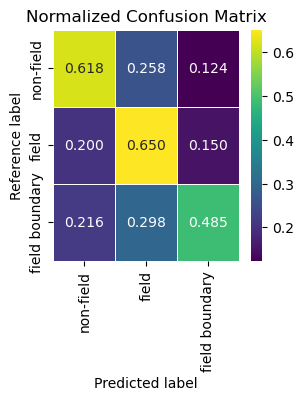


Test Metrics:
Overall Accuracy: 0.6209
Mean Accuracy: 0.5844
Mean IoU: 0.3655
mean Precision: 0.5083
mean Recall: 0.5844
Mean F1 Score: 0.5099


In [23]:
from src.lacuna.evaluate import evaluate
checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Inference & Evaluation
print("Running inference on test dataset...")
class_mapping = params_train["class_mapping"]

metrics = evaluate(
    model=model,
    dataloader=test_dataloader,
    num_classes=3,
    class_mapping=class_mapping,
    device=device,
    buffer=params_test.get('buffer', None),
    out_name=os.path.join(checkpoint_dir, "test_metrics.csv")
)

# Print and save results
print("\nTest Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

metrics_df = pd.DataFrame([metrics])
os.makedirs(params_test.get("out_dir", "./test_results"), exist_ok=True)
metrics_df.to_csv(os.path.join(checkpoint_dir, "summary_metrics.csv"), index=False)

#### Visualize Predictions

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, dataloader, class_mapping, device, num_images=4, save_dir=None, fname_prefix = "pred"):
    """
    Visualizes predictions alongside ground truth for a few samples.
    
    Args:
        model (nn.Module): Trained segmentation model.
        dataloader (DataLoader): Validation/test DataLoader.
        class_mapping (dict): Mapping of class indices to names.
        device (torch.device): CPU or CUDA.
        num_images (int): Number of samples to visualize.
    """

    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
    
    model.eval()
    cmap = plt.get_cmap("tab10")  # for consistent color mapping
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            for i in range(min(num_images, images.shape[0])):
                img = images[i].cpu().numpy()
                label = labels[i].cpu().numpy()
                pred = preds[i].cpu().numpy()

                # If image has 4 channels, use RGB only for visualization
                img_disp = img[:3, :, :] if img.shape[0] >= 3 else img
                img_disp = np.moveaxis(img_disp, 0, -1)  # CxHxW -> HxWxC
                img_disp = (img_disp - img_disp.min()) / (img_disp.max() - img_disp.min())

                fig, axes = plt.subplots(1, 3, figsize=(12, 4))
                axes[0].imshow(img_disp)
                axes[0].set_title("Input Image")
                axes[0].axis('off')

                axes[1].imshow(label, cmap="tab10", vmin=0, vmax=len(class_mapping)-1)
                axes[1].set_title("Ground Truth")
                axes[1].axis('off')

                axes[2].imshow(pred, cmap="tab10", vmin=0, vmax=len(class_mapping)-1)
                axes[2].set_title("Prediction")
                axes[2].axis('off')

                plt.tight_layout()
                plt.show()

                if save_dir is not None:
                    fname = f"{fname_prefix}_{i}.png"
                    fig_path = os.path.join(save_dir, fname)
                    fig.savefig(fig_path, dpi=300, bbox_inches="tight")
                    plt.close(fig)  # free memory
                    print(f"Saved → {fig_path}")

            break  # Only first batch


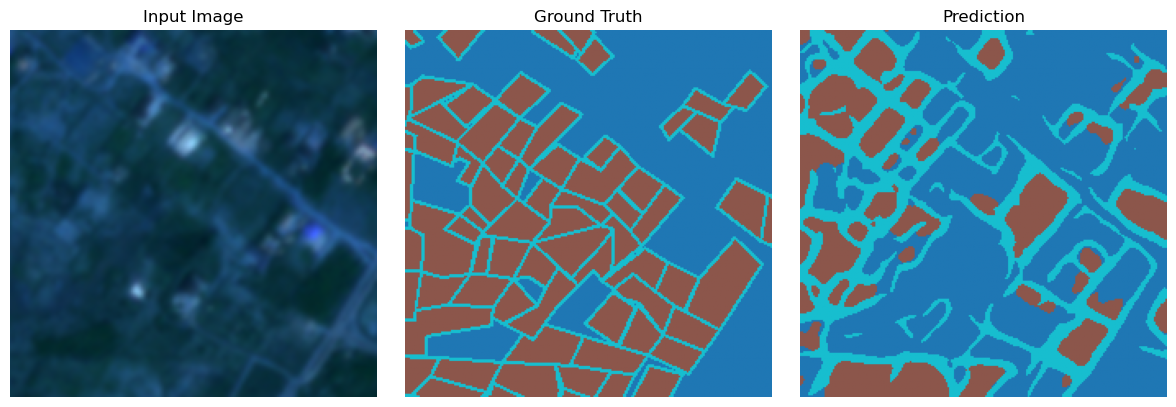

Saved → ./checkpoints/pred_0.png


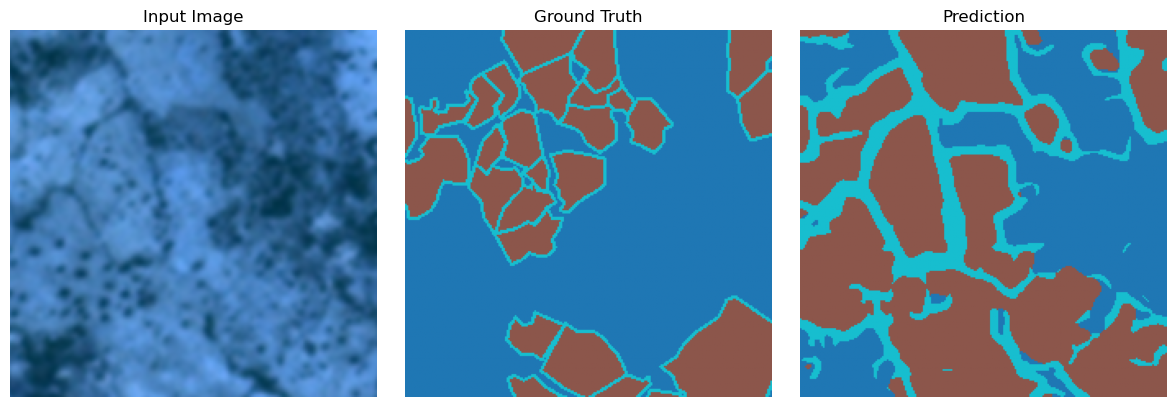

Saved → ./checkpoints/pred_1.png


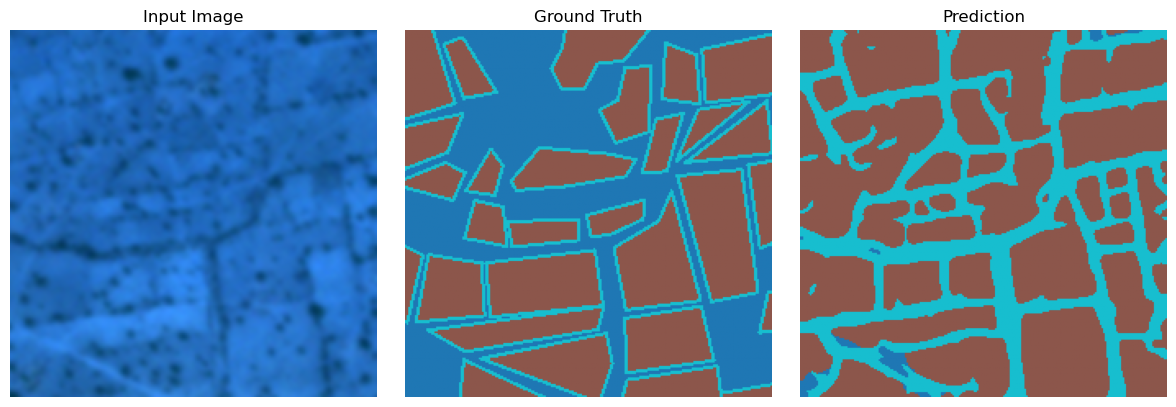

Saved → ./checkpoints/pred_2.png


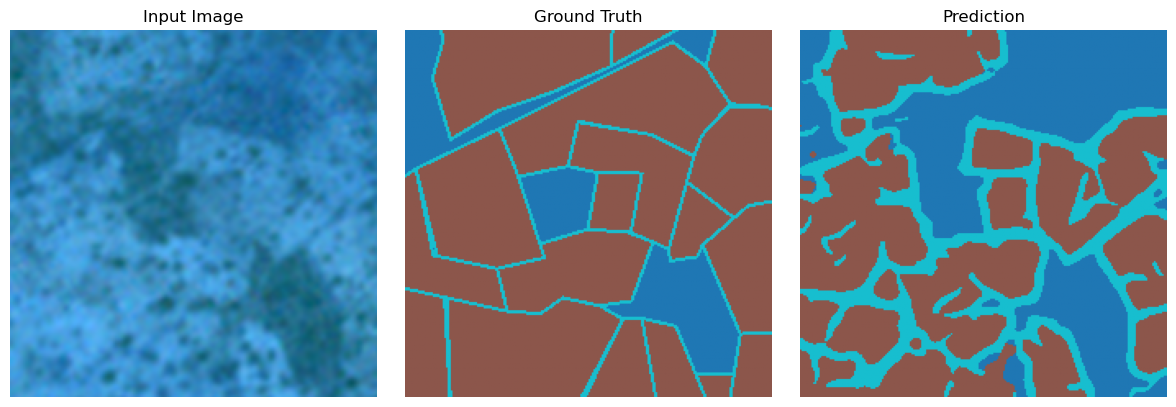

Saved → ./checkpoints/pred_3.png


In [28]:
class_mapping = params_train["class_mapping"]
visualize_predictions(
    model=model,
    dataloader=val_dataloader,
    class_mapping=class_mapping,
    device=device,
    num_images=4,
    save_dir=checkpoint_dir
)

In [29]:
import torch
torch.cuda.empty_cache()